In [3]:
# %pip install pycaret[full]

  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Using cached matplotlib-3.7.1-cp310-cp310-win_amd64.whl (7.6 MB)
  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Using cached nbformat-5.8.0-py3-none-any.whl (77 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached plotly_resampler-0.8.3.2-cp310-cp310-win_amd64.whl
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached schemdraw-0.16-py3-none-any.whl (105 kB)
  Using cached scipy-1.10.1-cp310-cp310-win_amd64.whl (42.5 MB)
  Using cached pyod-1.0.9-py3-none-any.whl
  Using cached statsmodels-0.13.5-cp310-cp310-win_amd64.whl (9.1 MB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached scikit_learn-1.2.2-cp310-cp310-win_amd64.whl (8.3 MB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached sktime-0.18.0-py3-none-any

In [18]:
from pycaret.classification import *
import pandas as pd

# from pycaret.datasets import get_data
# df = get_data('diabetes')

# df.head()
import pycaret
print('pycaret ver :', pycaret.__version__)

pycaret ver : 3.0.0


In [20]:
df = pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [23]:
# Make setup pipeline
clf = setup(df, target='Outcome', session_id=123, remove_outliers=True, normalize=True, normalize_method='minmax')

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(741, 9)"
5,Transformed train set shape,"(510, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [5]:
# best_model = compare_models()

# Compare models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [31]:
best_model = compare_models(include = ['catboost', 'rf', 'xgboost', 'ridge', 'gbc', 'ada', 'lightgbm'])


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:21:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [32]:
results = pull() 
print(results)

                                    Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.7782  0.0000  0.5333  0.7525   
catboost              CatBoost Classifier    0.7429  0.7963  0.5281  0.6685   
rf               Random Forest Classifier    0.7429  0.7943  0.5120  0.6871   
gbc          Gradient Boosting Classifier    0.7278  0.7845  0.5389  0.6390   
ada                  Ada Boost Classifier    0.7278  0.7660  0.5281  0.6314   
lightgbm  Light Gradient Boosting Machine    0.7095  0.7647  0.5184  0.5928   
xgboost         Extreme Gradient Boosting    0.6945  0.7531  0.5015  0.5752   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.6212  0.4724  0.4874     0.093  
catboost  0.5876  0.4047  0.4122     0.094  
rf        0.5807  0.4007  0.4138     0.118  
gbc       0.5806  0.3816  0.3876     0.122  
ada       0.5714  0.3754  0.3808     0.121  
lightgbm  0.5495  0.3380  0.3417     0.141  
xgboost   0.5318  0.3072  0.3117     0.082  


In [33]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


# Analyze Model

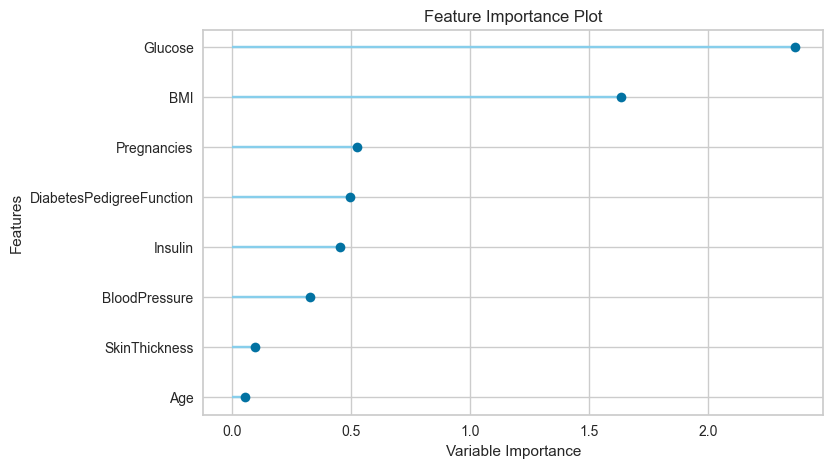

In [34]:
plot_model(best_model, plot = 'feature')

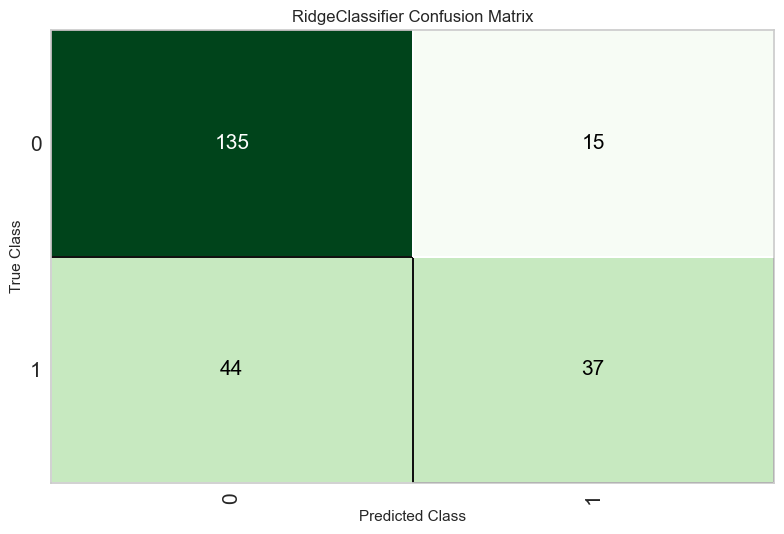

In [35]:
plot_model(best_model, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

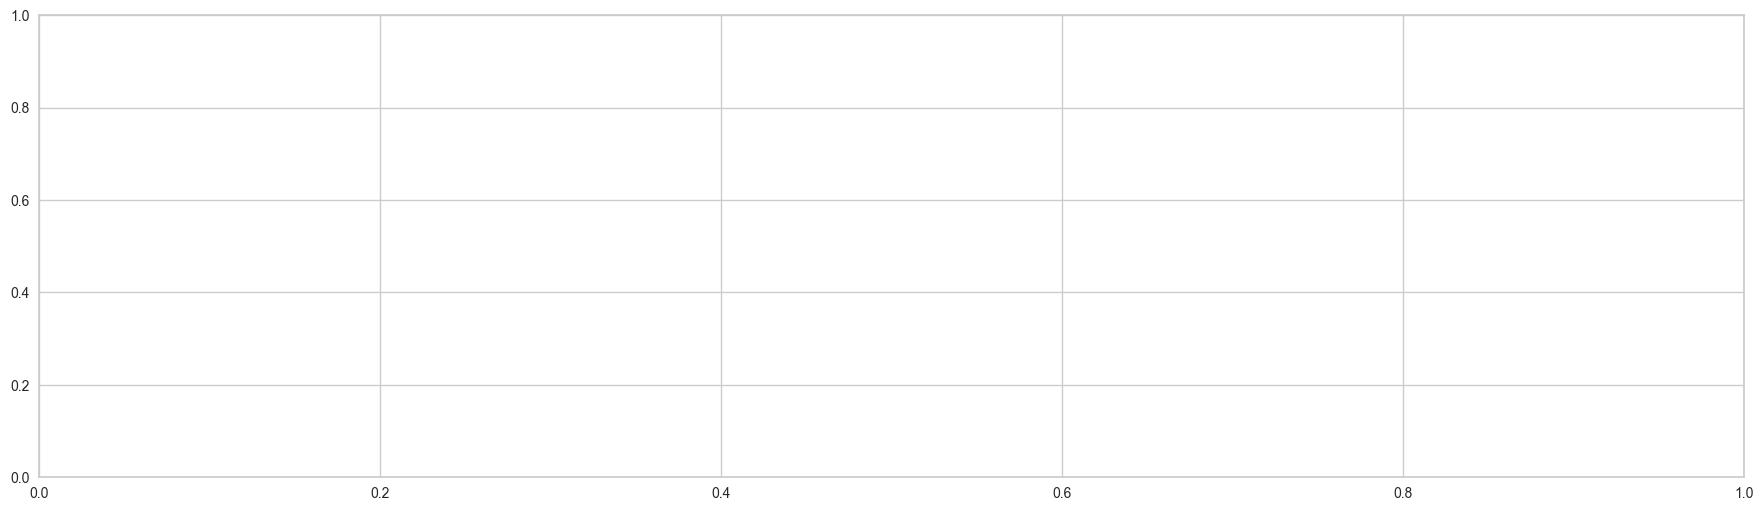

In [38]:
evaluate_model(best_model)

# AutoML

In [48]:
best_model = automl(optimize = 'Accuracy')
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

# Prediction

The predict_model function returns prediction_label and prediction_score (probability of the predicted class) as new columns in dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring

In [49]:
pred = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7446,0.6784,0.4568,0.7115,0.5564,0.3888,0.4076


We got **74%** Accuracy, not bad accuracy for beginning !!!

In [50]:
pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label
552,6,114,88,0,0,27.799999,0.247,66,0,0
438,1,97,70,15,0,18.200001,0.147,21,0,0
149,2,90,70,17,0,27.299999,0.085,22,0,0
373,2,105,58,40,94,34.900002,0.225,25,0,0
36,11,138,76,0,0,33.200001,0.420,35,0,1


In [52]:
new_df = df.copy()
df.drop('Outcome', axis = 1, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Trying to predict model on new data

In [63]:
new_pred = predict_model(best_model, new_df)
new_pred.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,prediction_label
0,6,148,72,35,0,33.599998,0.627,50,1
1,1,85,66,29,0,26.600000,0.351,31,0
2,8,183,64,0,0,23.299999,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.099998,2.288,33,1


# Save model

In [55]:
save_model(best_model, 'model1.0')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\nuril\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                                                n_jobs=1,
                                                                random_state=123,


In [47]:
# Load model
loaded_model = load_model('model1.0')
loaded_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\nuril\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pregnancies', 'Glucose',
                                             'BloodPressure', 'SkinThickness',
                                             'Insulin', 'BMI',
                                             'DiabetesPedigreeFunction',
                                             'Age'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False...
                                                               n_jobs=1,
                                                               random_state=123,
                                                               threshold=0.05))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True,
                                 fit_intercept=True, max_iter=None,
                                 positive=False, random_state=123,
                                 solver='auto', tol=0.0001))],
         verbose=False)